In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from quotaclimat.data_processing.factiva.explo_optimal_thresholds.utils_explo.utils_explo import (
    create_llm_columns_from_crises,
    plot_causal_link_metrics_by_multiplier,
    plot_threshold_metrics_by_multiplier,
    test_thresholds_all_causal_links,
    test_thresholds_all_crises,
)


# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

DATA_PATH = 'quotaclimat/data_processing/factiva/explo_optimal_thresholds/data_explo/factiva_keywords.xlsx'


In [2]:
df = pd.read_excel(DATA_PATH).drop(columns=["Unnamed: 0"], errors="ignore")

# Step 1: Create LLM columns from 'crises' and 'maillons_par_crise'

In [11]:
print("=" * 80)
print("STEP 1: Creating LLM columns from crises and maillons_par_crise")
print("=" * 80)

df = create_llm_columns_from_crises(df, prefix="LLM")

STEP 1: Creating LLM columns from crises and maillons_par_crise
✓ LLM columns created with prefix 'LLM'
  - Articles with crises: 1036
  - Articles without crisis: 1008


In [12]:
print("\n" + "=" * 80)
print("LLM LABELS DISTRIBUTION")
print("=" * 80)
print(f"Climat: {df['LLM_climat'].sum()} articles")
print(f"Biodiversité: {df['LLM_biodiversite'].sum()} articles")
print(f"Ressources: {df['LLM_ressources'].sum()} articles")
print(f"Total with crisis: {df['LLM_CRISE'].sum()} articles")
print(f"Total without crisis: {df['LLM_PAS DE CRISE'].sum()} articles")


LLM LABELS DISTRIBUTION
Climat: 554 articles
Biodiversité: 365 articles
Ressources: 780 articles
Total with crisis: 1036 articles
Total without crisis: 1008 articles


# Step 2: Test thresholds for all crises with different HRFP multipliers

In [13]:
print("\n" + "=" * 80)
print("STEP 2: Testing thresholds with different HRFP multipliers")
print("=" * 80)

# Define multipliers to test for each crisis
multipliers_to_test = {
    'climat': [0, 0.2, 0.34, 0.5, 0.75, 1.0],
    'biodiversite': [0, 0.2, 0.34, 0.5, 0.75, 1.0],
    'ressources': [0, 0.2, 0.34, 0.5, 0.75, 1.0],
}

# Define thresholds to test (1 to 10)
thresholds_to_test = list(range(1, 11))

# Run the threshold testing
results_df = test_thresholds_all_crises(
    df,
    multipliers_hrfp=multipliers_to_test,
    thresholds=thresholds_to_test,
    llm_prefix="LLM"
)


STEP 2: Testing thresholds with different HRFP multipliers

Testing thresholds for climat...
  - Multiplier HRFP: 0
  - Multiplier HRFP: 0.2
  - Multiplier HRFP: 0.34
  - Multiplier HRFP: 0.5
  - Multiplier HRFP: 0.75
  - Multiplier HRFP: 1.0

Testing thresholds for biodiversite...
  - Multiplier HRFP: 0
  - Multiplier HRFP: 0.2
  - Multiplier HRFP: 0.34
  - Multiplier HRFP: 0.5
  - Multiplier HRFP: 0.75
  - Multiplier HRFP: 1.0

Testing thresholds for ressources...
  - Multiplier HRFP: 0
  - Multiplier HRFP: 0.2
  - Multiplier HRFP: 0.34
  - Multiplier HRFP: 0.5
  - Multiplier HRFP: 0.75
  - Multiplier HRFP: 1.0


# Step 3: Visualize results - One figure per multiplier with 3 subplots (one per crisis)


STEP 3: Creating visualizations


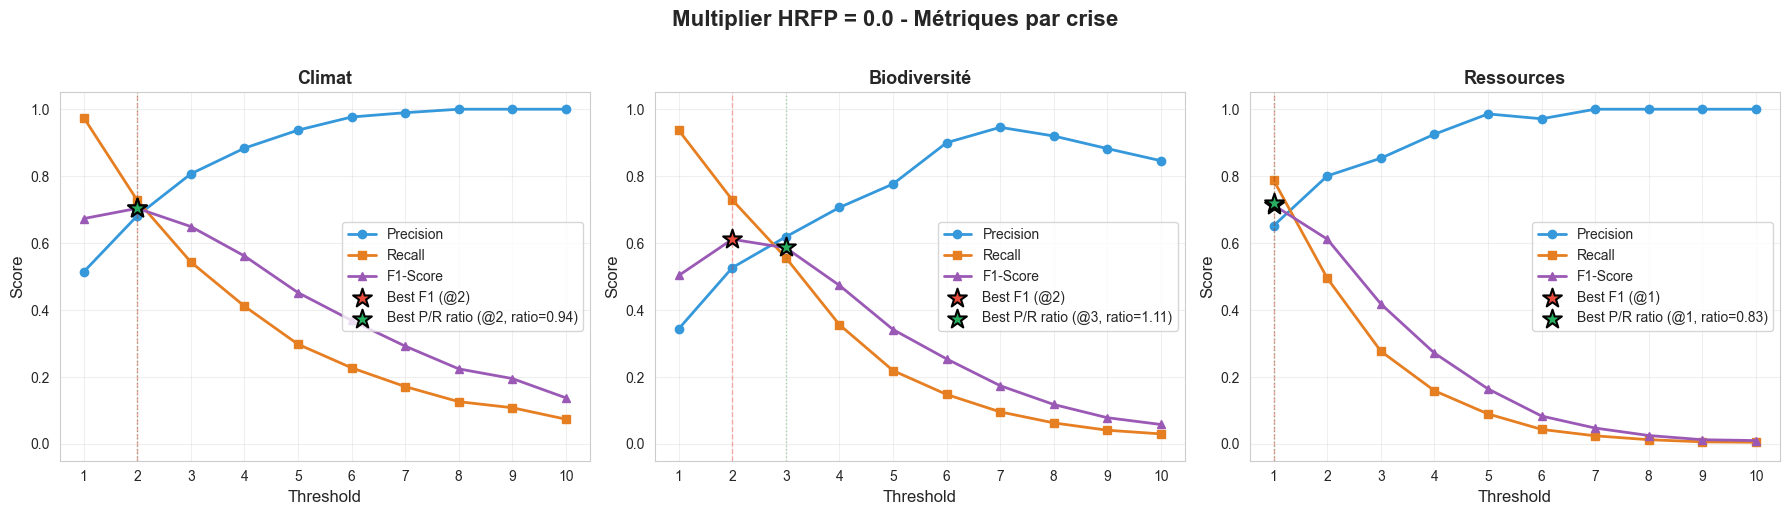

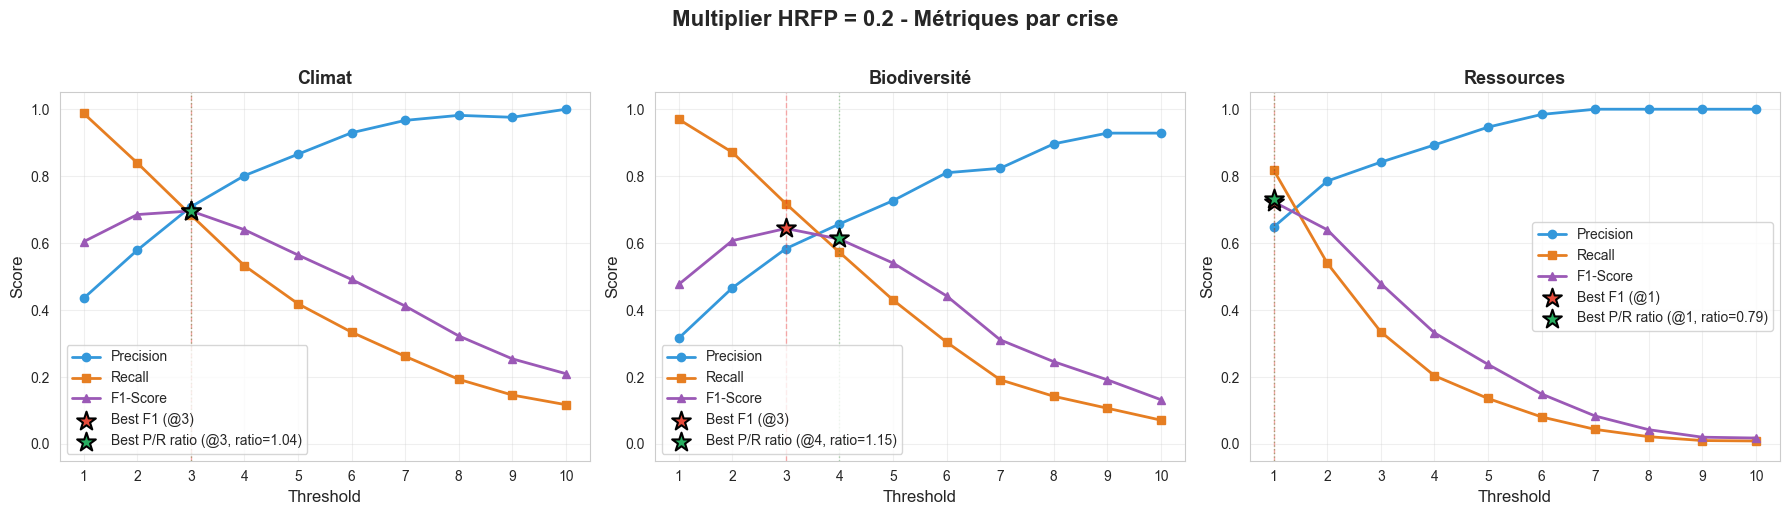

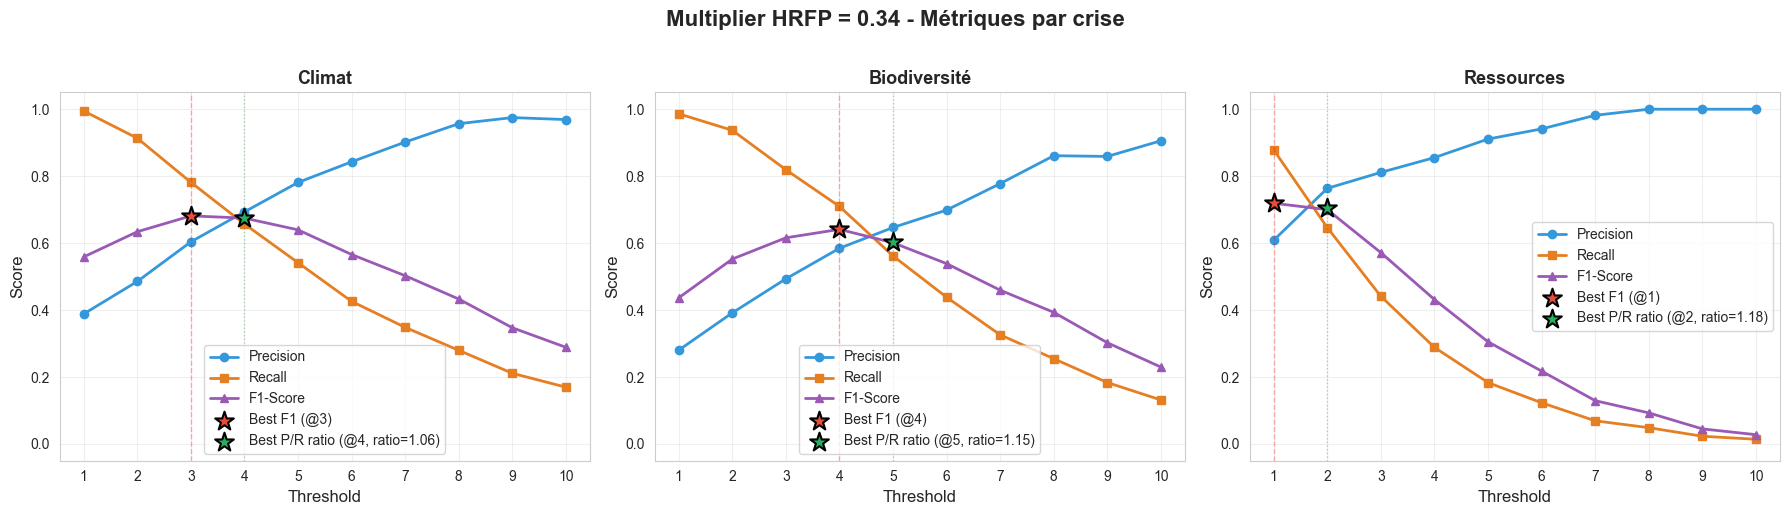

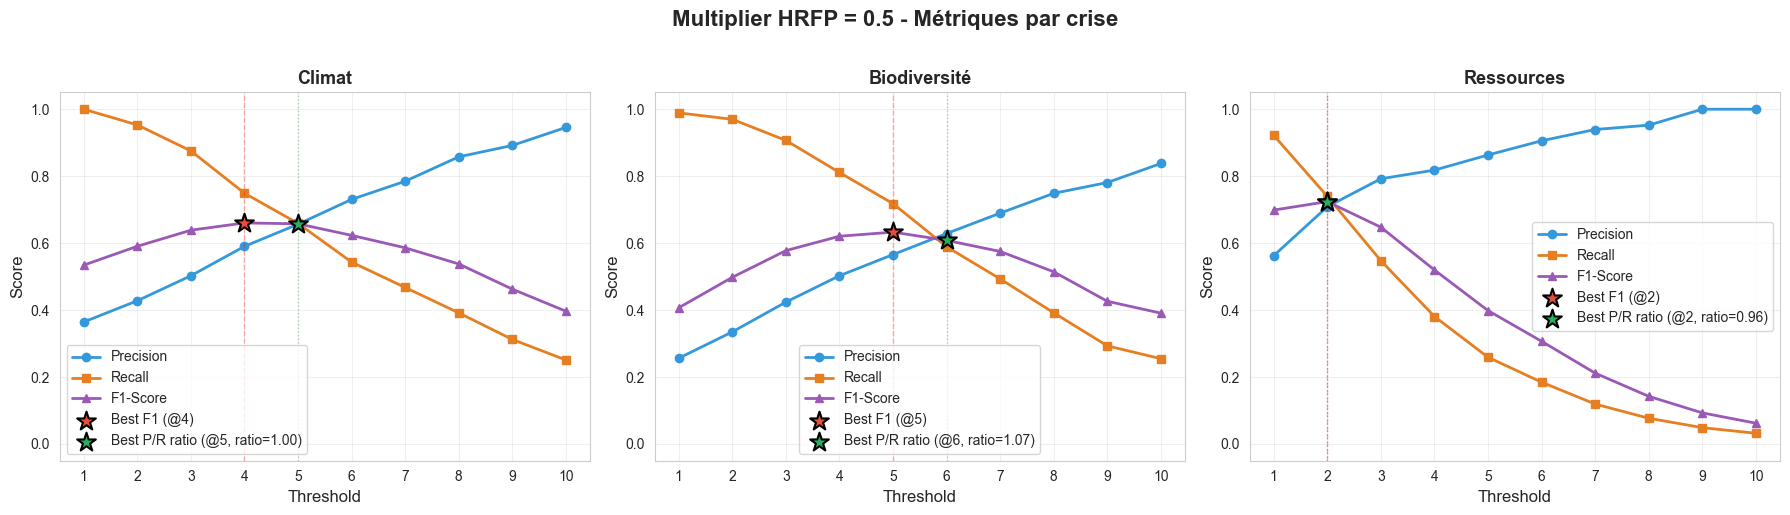

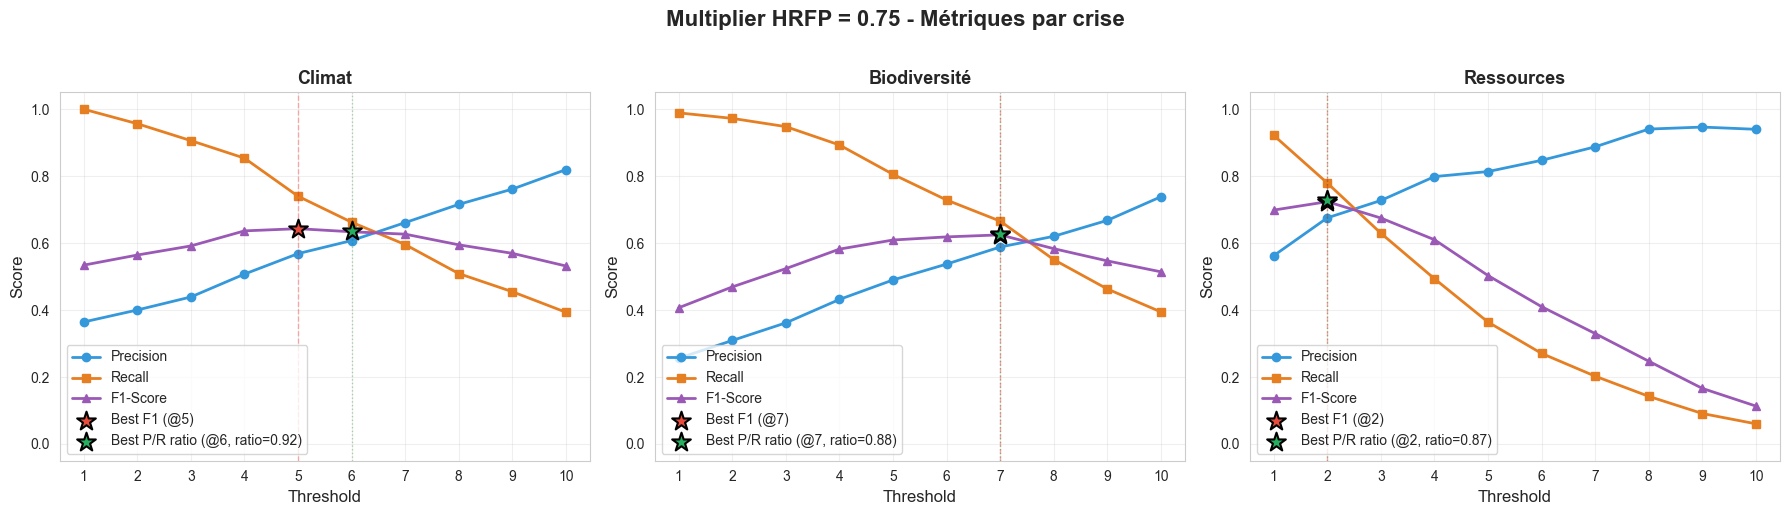

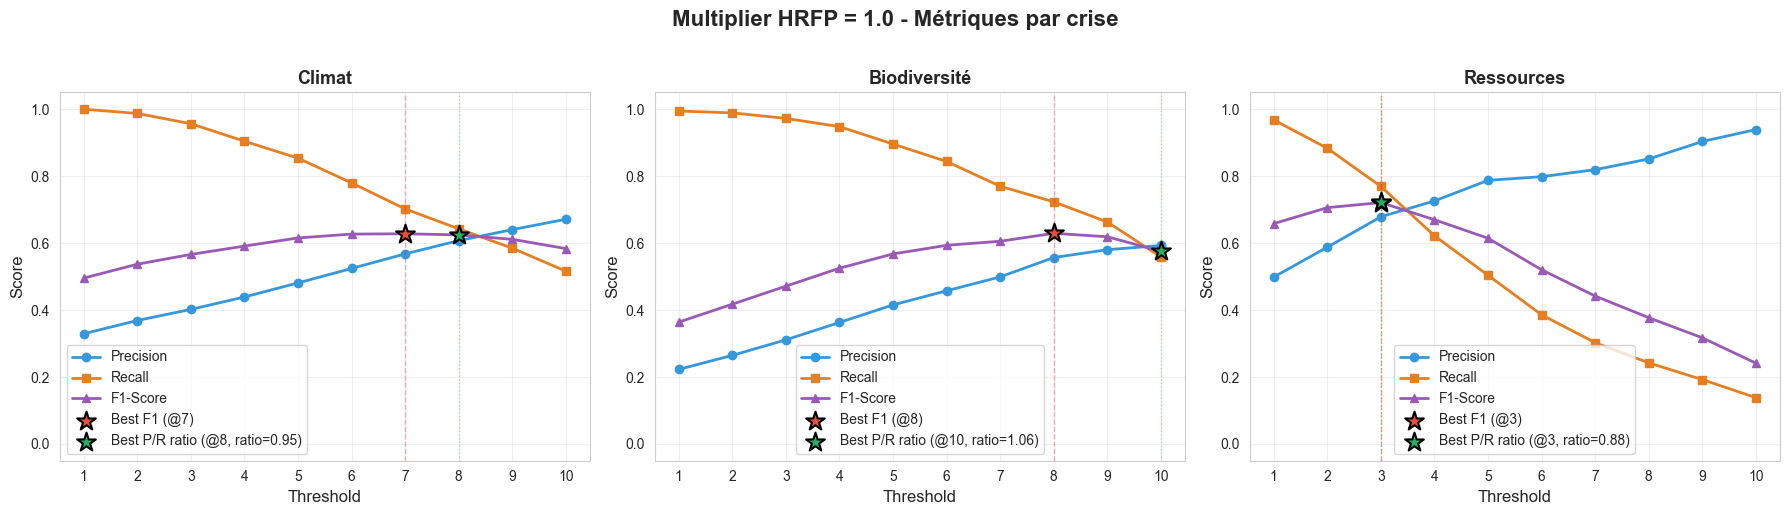

In [14]:
print("\n" + "=" * 80)
print("STEP 3: Creating visualizations")
print("=" * 80)

plot_threshold_metrics_by_multiplier(results_df, thresholds_to_test)

# Step 4: Summary table - Best thresholds per crisis and multiplier

In [20]:
print("\n" + "=" * 80)
print("STEP 4: Summary of best thresholds")
print("=" * 80)

best_thresholds = []
crises = ['climat', 'biodiversite', 'ressources']

for crisis in crises:
    crisis_results = results_df[results_df['crisis'] == crisis]
    multipliers = sorted(crisis_results['multiplier_hrfp'].unique())
    
    for multiplier in multipliers:
        data = crisis_results[crisis_results['multiplier_hrfp'] == multiplier]
        
        # Find best threshold for F1-score
        best_f1_idx = data['f1_score'].idxmax()
        if pd.notna(best_f1_idx):
            best_row = data.loc[best_f1_idx]
            best_thresholds.append({
                'crisis': crisis,
                'multiplier_hrfp': multiplier,
                'best_threshold': best_row['threshold'],
                'f1_score': best_row['f1_score'],
                'precision': best_row['precision'],
                'recall': best_row['recall'],
                'true_positives': best_row['true_positives'],
                'false_positives': best_row['false_positives'],
                'false_negatives': best_row['false_negatives'],
            })

best_thresholds_df = pd.DataFrame(best_thresholds)
best_thresholds_df


STEP 4: Summary of best thresholds


,crisis,multiplier_hrfp,best_threshold,f1_score,precision,recall,true_positives,false_positives,false_negatives
0,climat,0.00,2,0.703930,0.681895,0.727437,403,188,151
1,climat,0.20,3,0.696051,0.708411,0.684116,379,156,175
2,climat,0.34,3,0.681353,0.603905,0.781588,433,284,121
3,climat,0.50,4,0.660302,0.590327,0.749097,415,288,139
4,climat,0.75,5,0.643137,0.568655,0.740072,410,311,144
5,climat,1.00,7,0.627926,0.567883,0.702166,389,296,165
6,biodiversite,0.00,2,0.611494,0.526733,0.728767,266,239,99
7,biodiversite,0.20,3,0.643735,0.583519,0.717808,262,187,103
8,biodiversite,0.34,4,0.641089,0.584650,0.709589,259,184,106
9,biodiversite,0.50,5,0.632850,0.565875,0.717808,262,201,103


# Step 5: Test thresholds for causal links

In [21]:
print("\n" + "=" * 80)
print("STEP 5: Testing thresholds for causal links")
print("=" * 80)

# Run threshold testing for causal links
# Uses optimal crisis thresholds from results_df (where P/R ratio is closest to 1)
causal_link_results_df = test_thresholds_all_causal_links(
    df,
    crisis_results_df=results_df,
    multipliers_hrfp=multipliers_to_test,
    thresholds=thresholds_to_test,
    llm_prefix="LLM"
)

# %%
# Display sample results for causal links
print("\n" + "=" * 80)
print("SAMPLE CAUSAL LINK RESULTS")
print("=" * 80)
causal_link_results_df.head(20)



STEP 5: Testing thresholds for causal links

Testing causal links for climat...
  - Multiplier HRFP: 0
    Using crisis threshold: 2 (best P/R ratio)
      Testing constat...
      Testing cause...
      Testing consequence...
      Testing solution...
  - Multiplier HRFP: 0.2
    Using crisis threshold: 3 (best P/R ratio)
      Testing constat...
      Testing cause...
      Testing consequence...
      Testing solution...
  - Multiplier HRFP: 0.34
    Using crisis threshold: 4 (best P/R ratio)
      Testing constat...
      Testing cause...
      Testing consequence...
      Testing solution...
  - Multiplier HRFP: 0.5
    Using crisis threshold: 5 (best P/R ratio)
      Testing constat...
      Testing cause...
      Testing consequence...
      Testing solution...
  - Multiplier HRFP: 0.75
    Using crisis threshold: 6 (best P/R ratio)
      Testing constat...
      Testing cause...
      Testing consequence...
      Testing solution...
  - Multiplier HRFP: 1.0
    Using crisis th

,threshold,crisis,causal_link,crisis_threshold,multiplier_hrfp,precision,recall,f1_score,precision_recall_ratio,true_positives,false_positives,true_negatives,false_negatives,total_predicted_positive,total_true_positive
0,1,climat,constat,2,0.0,0.445415,0.710801,0.547651,0.626638,204,254,1503,83,458,287
1,2,climat,constat,2,0.0,0.620968,0.536585,0.575701,1.157258,154,94,1663,133,248,287
2,3,climat,constat,2,0.0,0.800000,0.320557,0.457711,2.495652,92,23,1734,195,115,287
3,4,climat,constat,2,0.0,0.903226,0.195122,0.320917,4.629032,56,6,1751,231,62,287
4,5,climat,constat,2,0.0,0.944444,0.118467,0.210526,7.972222,34,2,1755,253,36,287
5,6,climat,constat,2,0.0,1.000000,0.059233,0.111842,16.882353,17,0,1757,270,17,287
6,7,climat,constat,2,0.0,1.000000,0.024390,0.047619,41.000000,7,0,1757,280,7,287
7,8,climat,constat,2,0.0,1.000000,0.017422,0.034247,57.400000,5,0,1757,282,5,287
8,9,climat,constat,2,0.0,1.000000,0.006969,0.013841,143.500000,2,0,1757,285,2,287
9,10,climat,constat,2,0.0,0.000000,0.000000,0.000000,inf,0,0,1757,287,0,287


# Step 6: Visualize causal link results


STEP 6: Creating visualizations for causal links


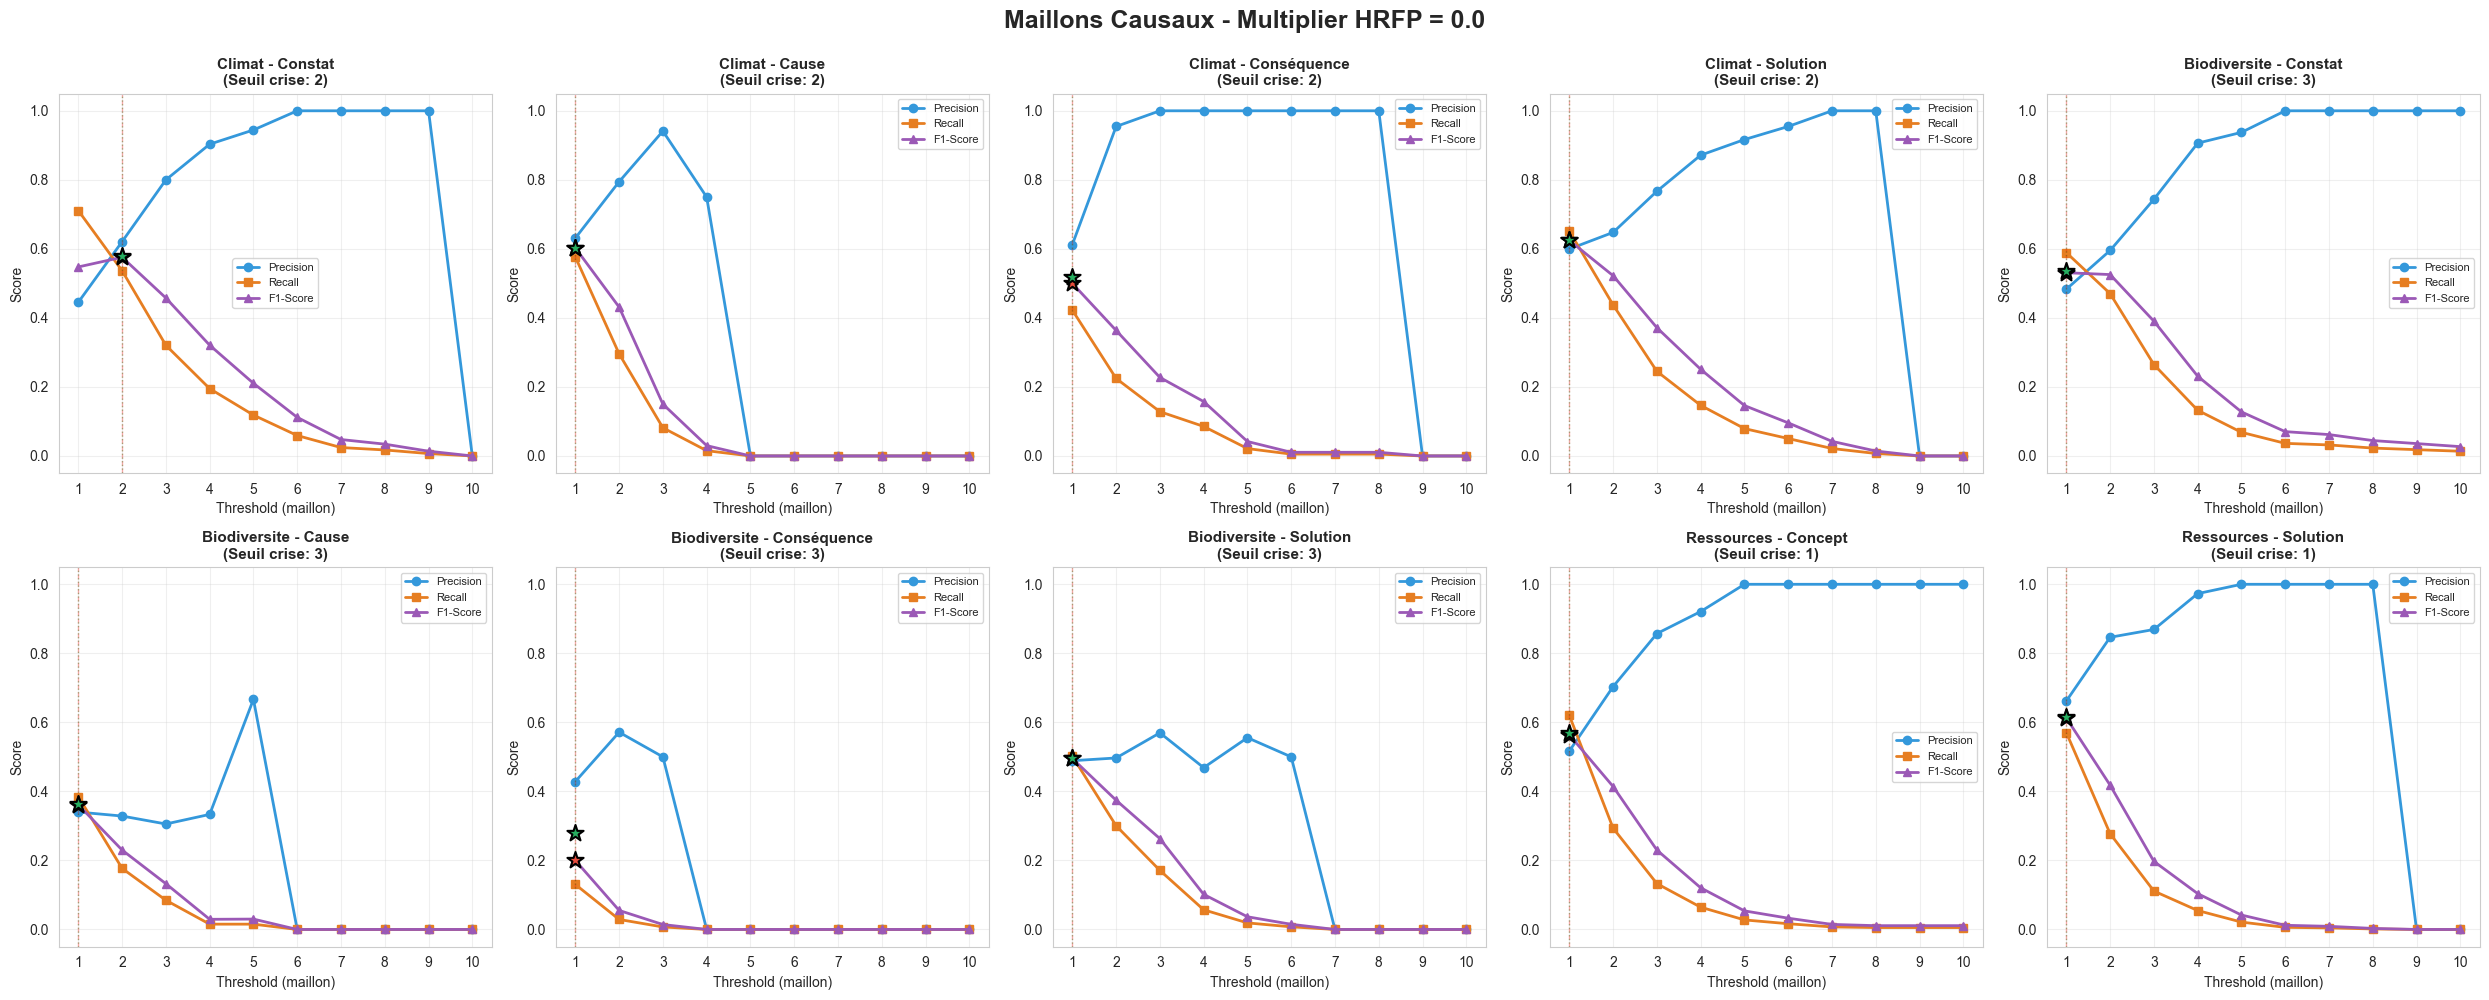

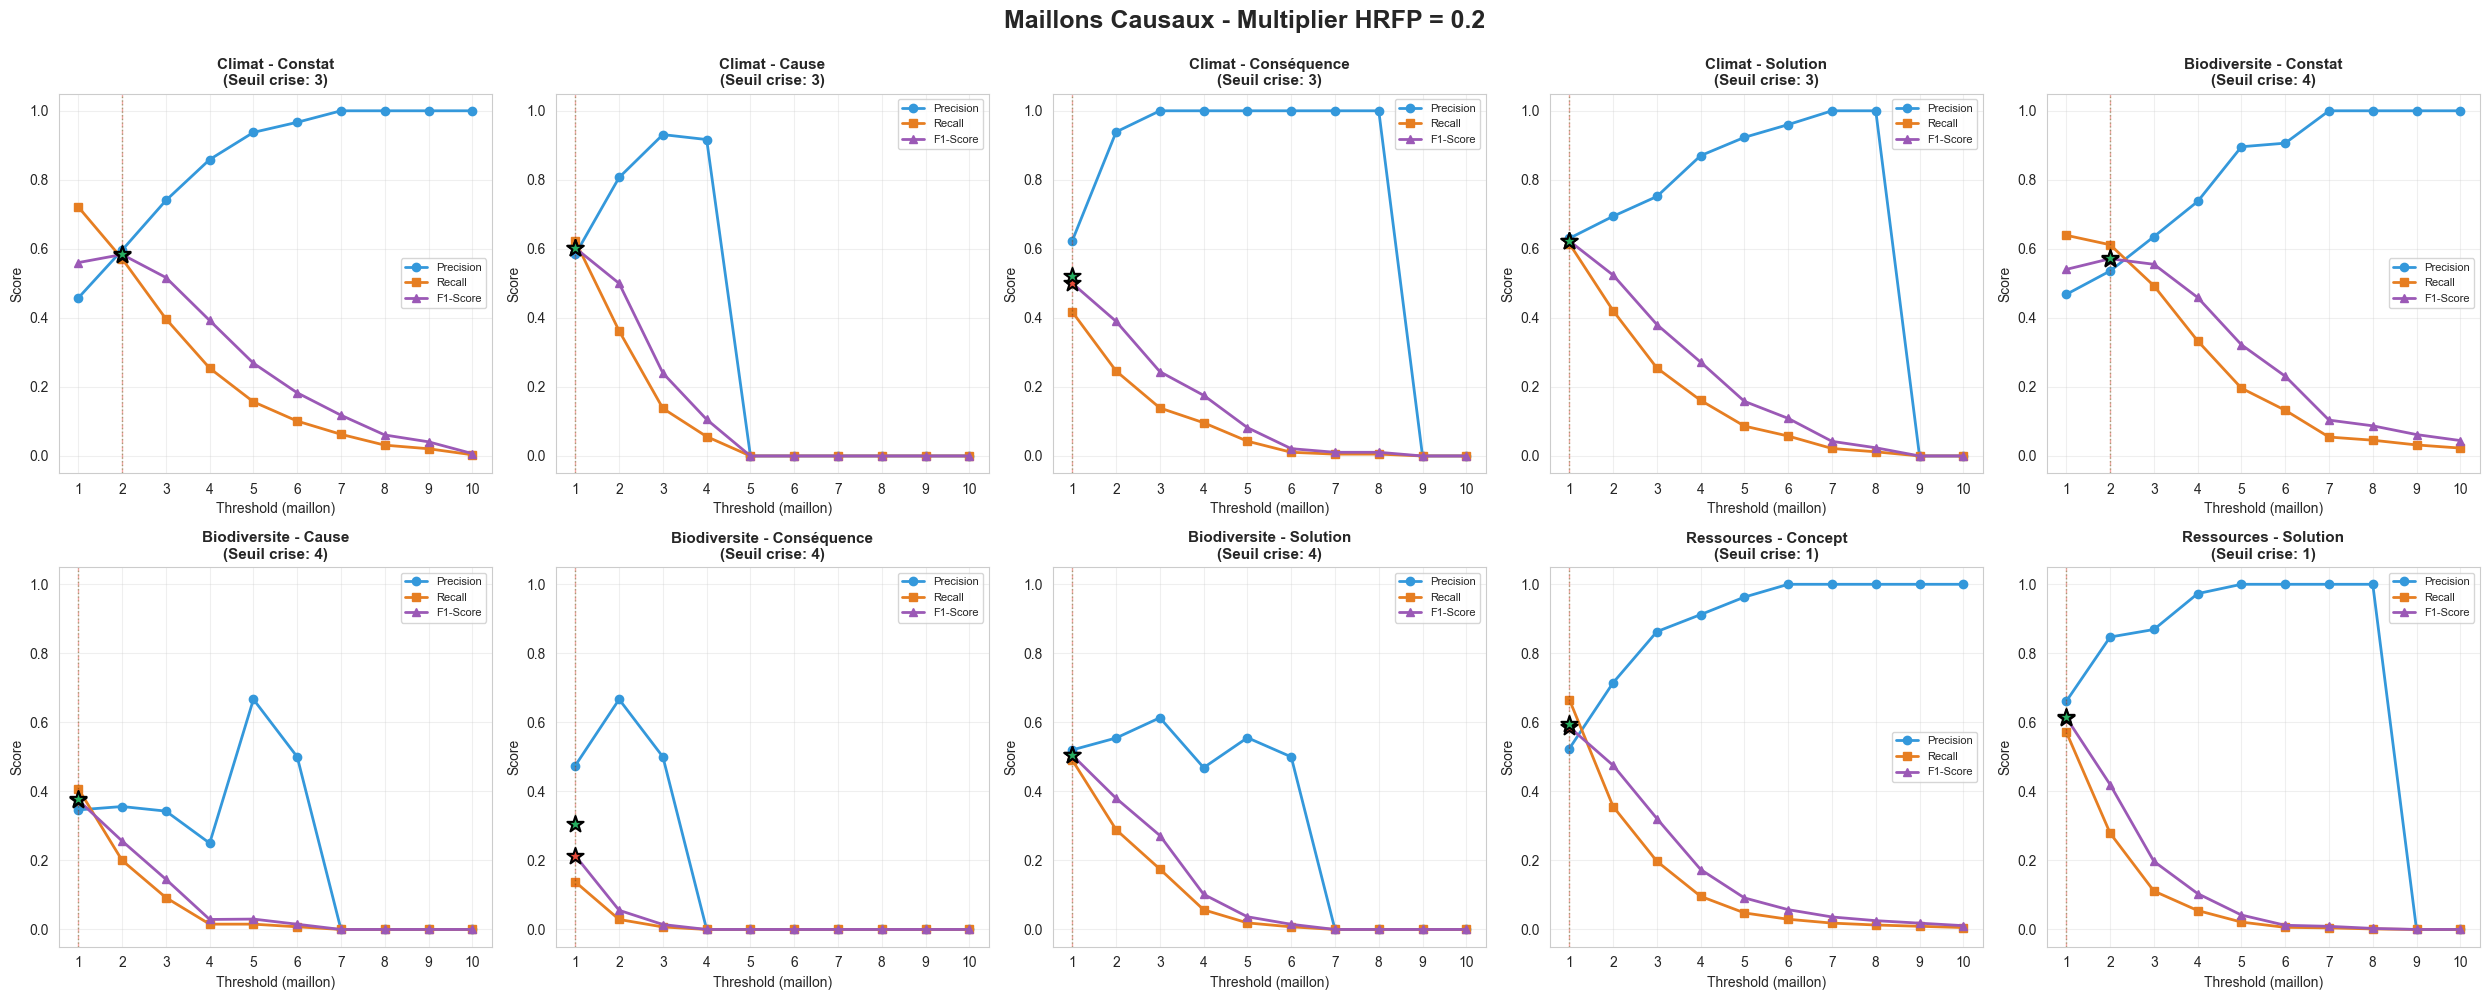

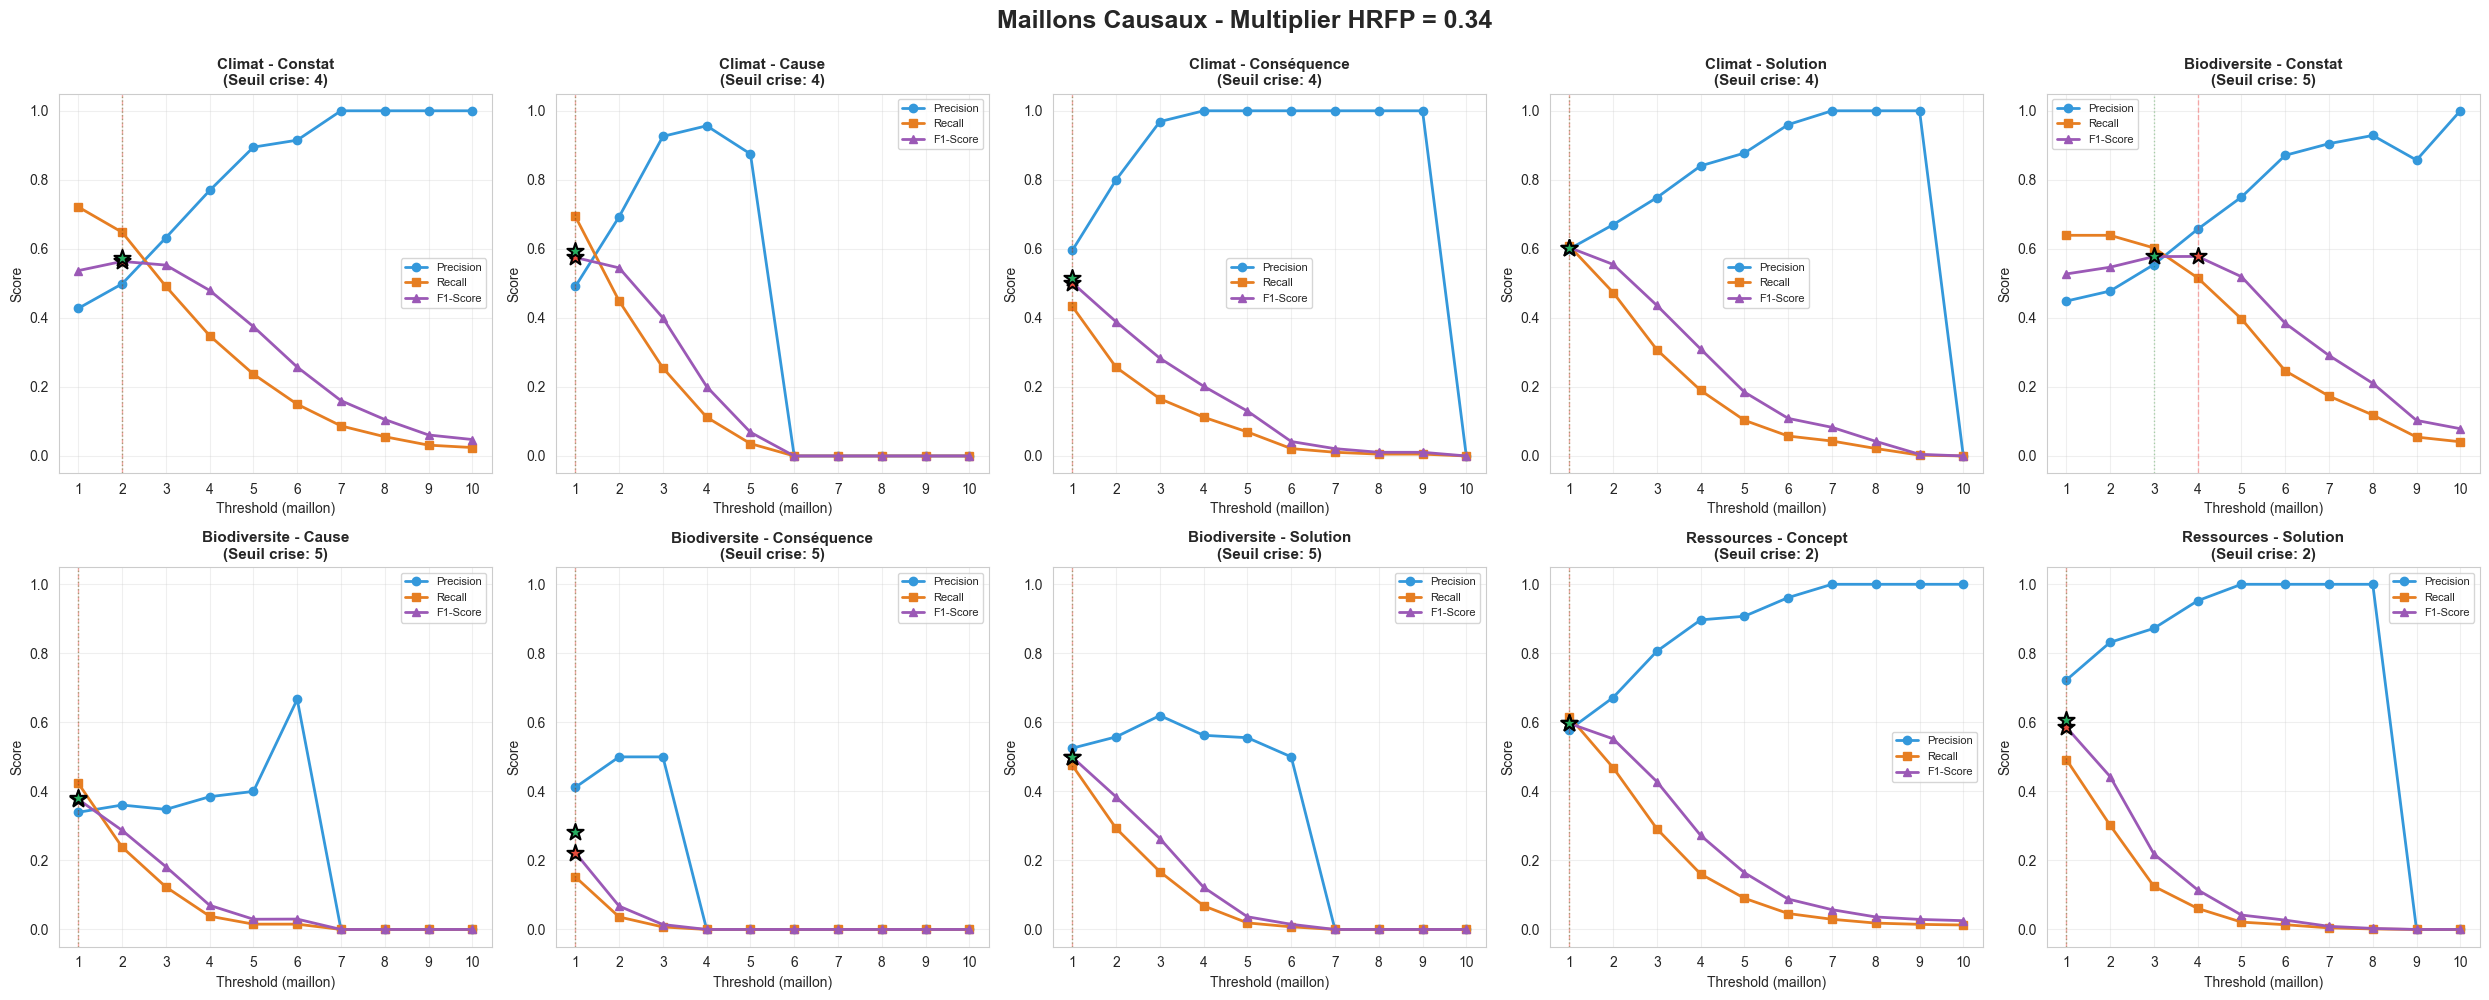

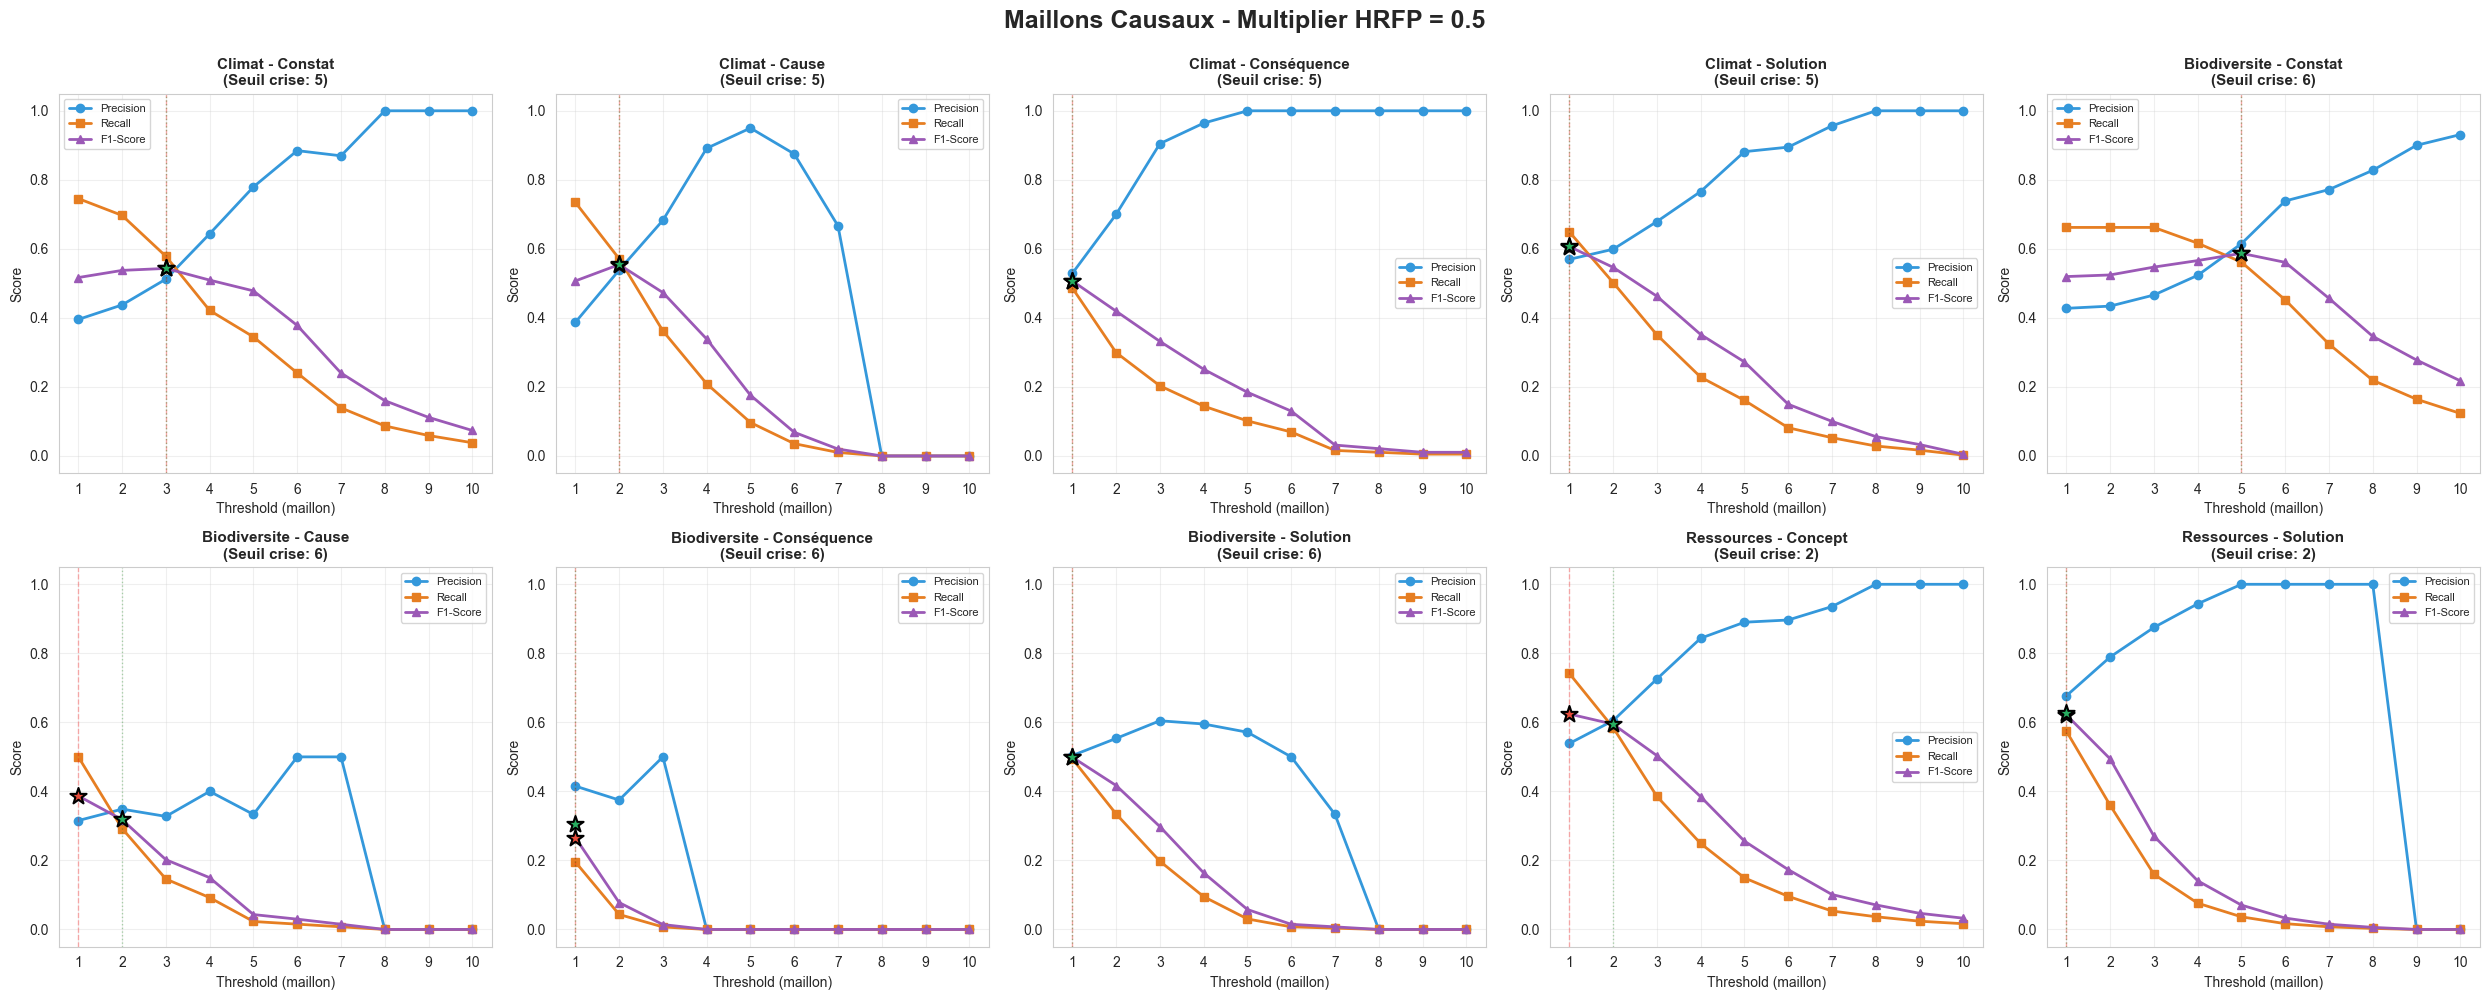

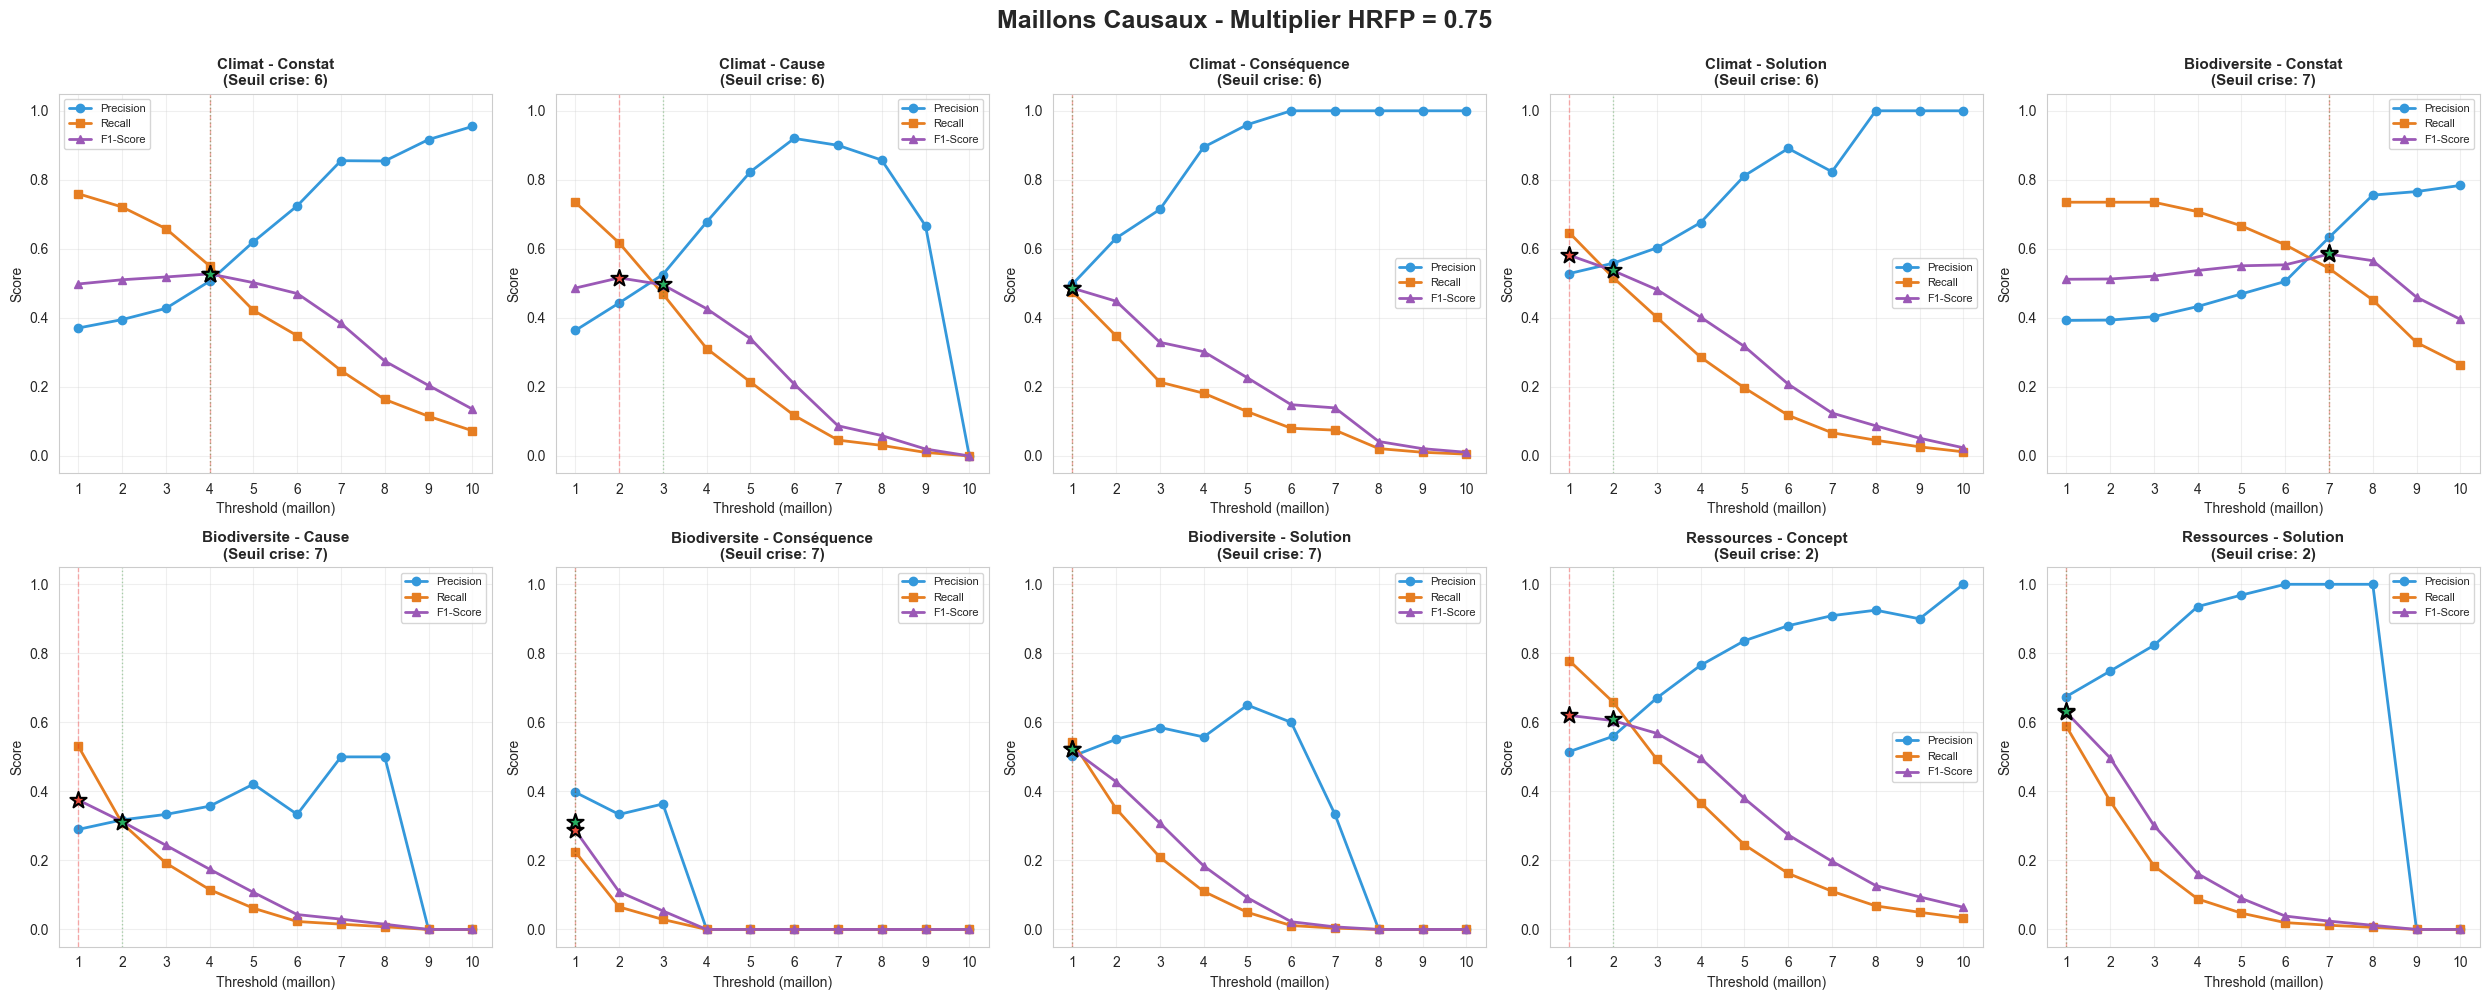

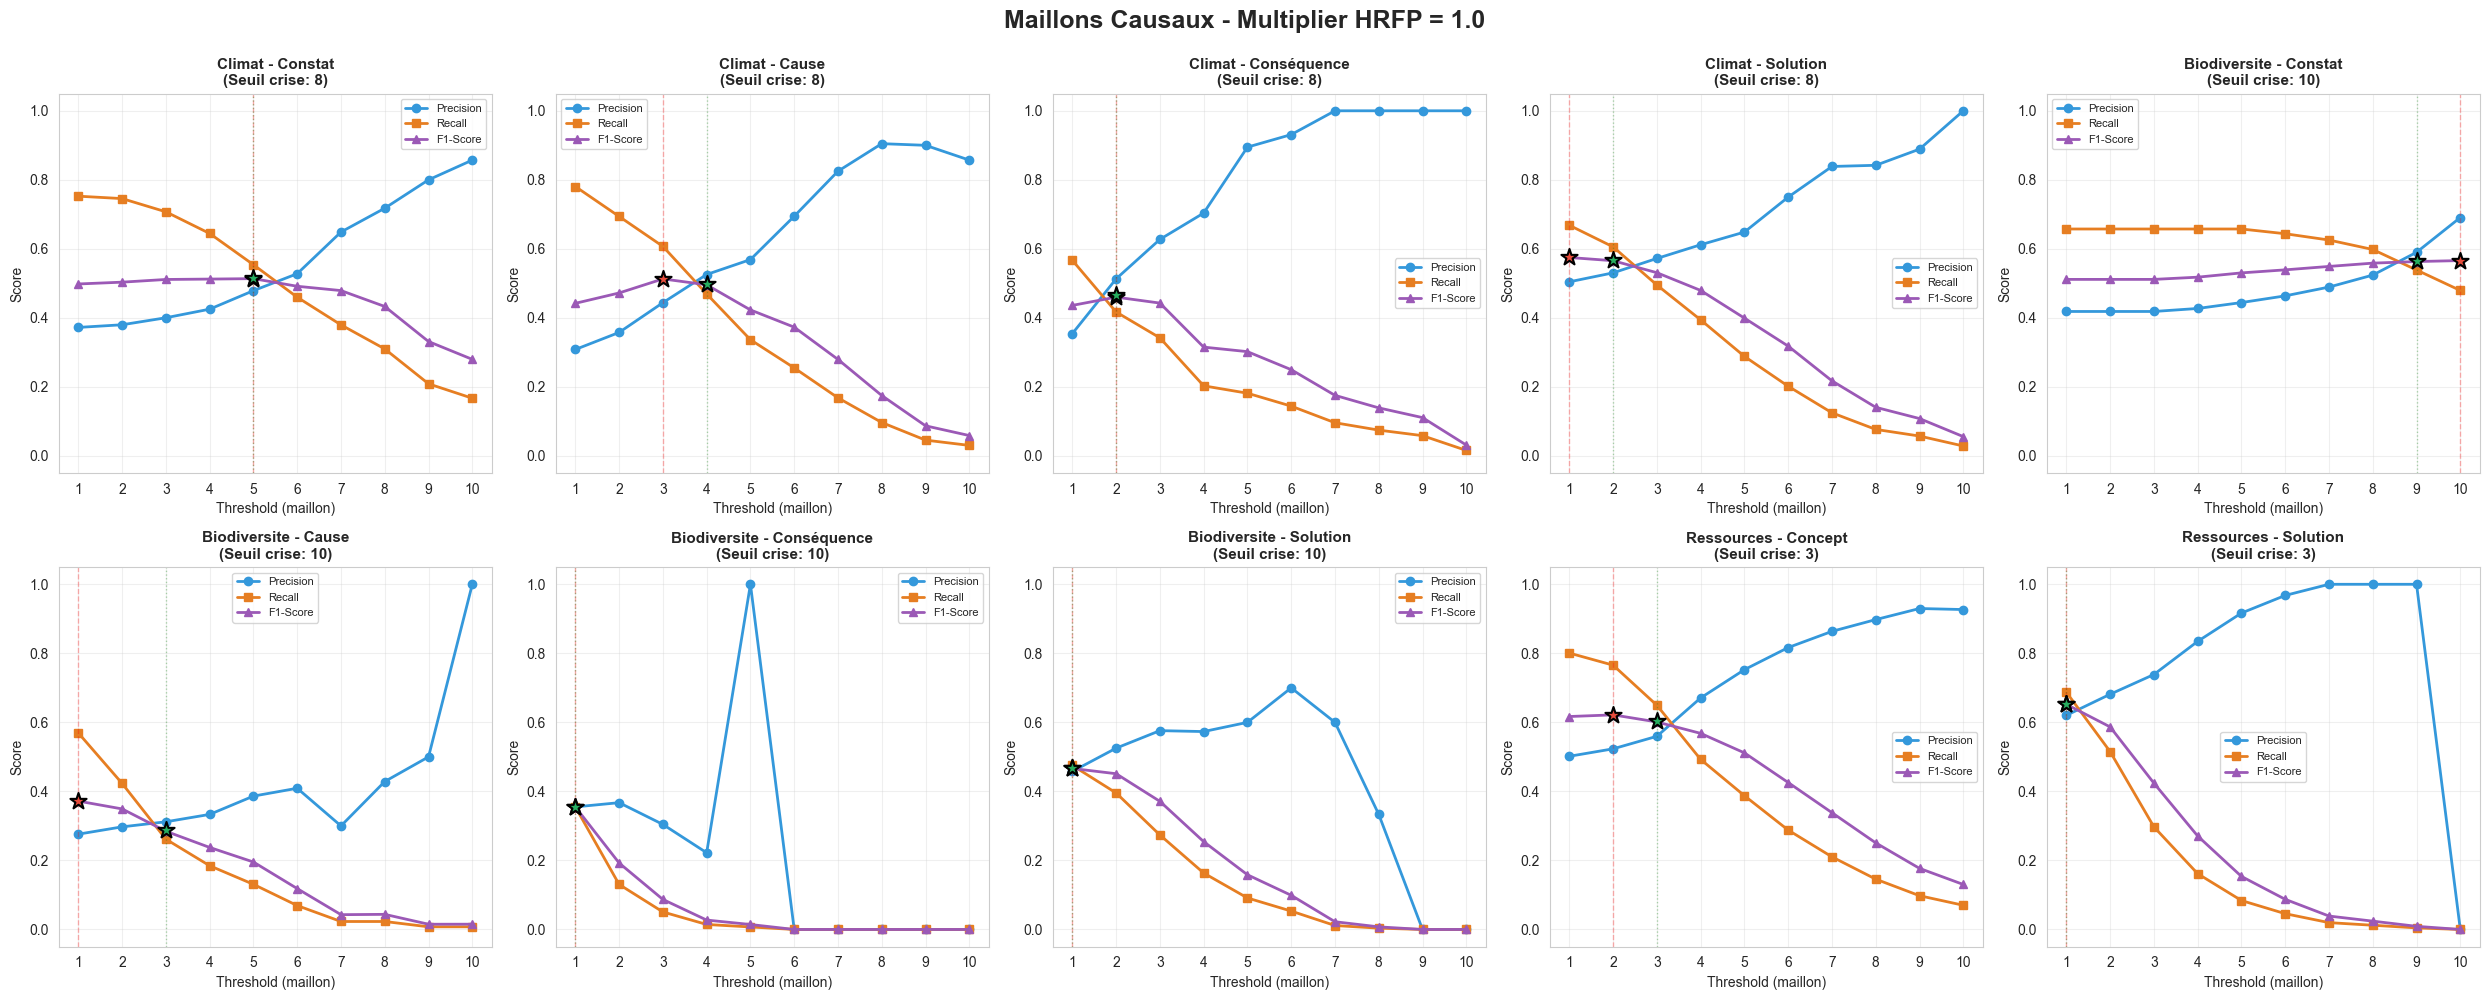

In [23]:
print("\n" + "=" * 80)
print("STEP 6: Creating visualizations for causal links")
print("=" * 80)

plot_causal_link_metrics_by_multiplier(causal_link_results_df, thresholds_to_test)

# Step 7: Summary table for causal links - Best thresholds

In [ ]:

print("\n" + "=" * 80)
print("STEP 7: Summary of best thresholds for causal links")
print("=" * 80)

best_causal_thresholds = []

for crisis in crises:
    crisis_data = causal_link_results_df[causal_link_results_df['crisis'] == crisis]
    causal_links = sorted(crisis_data['causal_link'].unique())
    
    for causal_link in causal_links:
        link_data = crisis_data[crisis_data['causal_link'] == causal_link]
        multipliers = sorted(link_data['multiplier_hrfp'].unique())
        
        for multiplier in multipliers:
            data = link_data[link_data['multiplier_hrfp'] == multiplier]
            
            # Find best threshold for F1-score
            best_f1_idx = data['f1_score'].idxmax()
            if pd.notna(best_f1_idx):
                best_row = data.loc[best_f1_idx]
                best_causal_thresholds.append({
                    'crisis': crisis,
                    'causal_link': causal_link,
                    'multiplier_hrfp': multiplier,
                    'crisis_threshold': best_row['crisis_threshold'],
                    'best_causal_threshold': best_row['threshold'],
                    'f1_score': best_row['f1_score'],
                    'precision': best_row['precision'],
                    'recall': best_row['recall'],
                    'precision_recall_ratio': best_row['precision_recall_ratio'],
                    'true_positives': best_row['true_positives'],
                    'false_positives': best_row['false_positives'],
                    'false_negatives': best_row['false_negatives'],
                })

best_causal_thresholds_df = pd.DataFrame(best_causal_thresholds)
print(best_causal_thresholds_df)


STEP 7: Summary of best thresholds for causal links
          crisis  causal_link  multiplier_hrfp  crisis_threshold  \
0         climat        cause             0.00                 2   
1         climat        cause             0.20                 3   
2         climat        cause             0.34                 4   
3         climat        cause             0.50                 5   
4         climat        cause             0.75                 6   
5         climat        cause             1.00                 8   
6         climat  consequence             0.00                 2   
7         climat  consequence             0.20                 3   
8         climat  consequence             0.34                 4   
9         climat  consequence             0.50                 5   
10        climat  consequence             0.75                 6   
11        climat  consequence             1.00                 8   
12        climat      constat             0.00                 